In [9]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Data load
diabetes = load_diabetes()

In [10]:
# Check data structure
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [14]:
# Store feature data and target data
x_data = diabetes.data
y_data = diabetes.target

print(x_data.shape)
print(y_data.shape)

(442, 10)
(442,)


In [15]:
import numpy as np

X = np.array(x_data)
y = np.array(y_data)

In [17]:
from sklearn.model_selection import train_test_split

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [18]:
# Define model function
def model(X, W, b):
    predictions = X.dot(W) + b
    return predictions

In [19]:
# Define MSE function
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [27]:
# Define loss function
def loss(X, W, b, y):
    pred = model(X, W, b)
    L = MSE(pred, y)
    return L

In [41]:
# Define gradient function
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = (2/N) * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [43]:
# Find correlation coefficient of each features
feature_names = diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

correlations = df.corr()['target'].drop('target')

print(correlations.sort_values(ascending=False))

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


In [44]:
# Delete less correlation coeffecient features
features_to_remove = ['sex', 's2', 'age']

X_df_train = pd.DataFrame(X_train, columns=feature_names)
X_df_test = pd.DataFrame(X_test, columns=feature_names)

X_df_train_filtered = X_df_train.drop(columns=features_to_remove)
X_df_test_filtered = X_df_test.drop(columns=features_to_remove)

X_train = X_df_train_filtered.to_numpy()
X_test = X_df_test_filtered.to_numpy()

In [52]:
# Select learning rate
lr = 0.1

# Set loss array and random W, b
losses = []
W = np.random.rand(len(X_train[0]))
b = np.random.rand()

# Learning...
for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d: Loss %0.4f' % (i, L))

Iteration 50: Loss 5617.4822
Iteration 100: Loss 5308.8830
Iteration 150: Loss 5041.4445
Iteration 200: Loss 4809.5042
Iteration 250: Loss 4608.1849
Iteration 300: Loss 4433.2854
Iteration 350: Loss 4281.1865
Iteration 400: Loss 4148.7700
Iteration 450: Loss 4033.3496
Iteration 500: Loss 3932.6106
Iteration 550: Loss 3844.5583
Iteration 600: Loss 3767.4735
Iteration 650: Loss 3699.8746
Iteration 700: Loss 3640.4843
Iteration 750: Loss 3588.2014
Iteration 800: Loss 3542.0763
Iteration 850: Loss 3501.2901
Iteration 900: Loss 3465.1363
Iteration 950: Loss 3433.0054
Iteration 1000: Loss 3404.3713
Iteration 1050: Loss 3378.7800
Iteration 1100: Loss 3355.8393
Iteration 1150: Loss 3335.2105
Iteration 1200: Loss 3316.6009
Iteration 1250: Loss 3299.7574
Iteration 1300: Loss 3284.4612
Iteration 1350: Loss 3270.5229
Iteration 1400: Loss 3257.7786
Iteration 1450: Loss 3246.0860
Iteration 1500: Loss 3235.3222
Iteration 1550: Loss 3225.3802
Iteration 1600: Loss 3216.1673
Iteration 1650: Loss 3207.60

Iteration 13600: Loss 2991.0977
Iteration 13650: Loss 2991.0506
Iteration 13700: Loss 2991.0039
Iteration 13750: Loss 2990.9577
Iteration 13800: Loss 2990.9120
Iteration 13850: Loss 2990.8667
Iteration 13900: Loss 2990.8218
Iteration 13950: Loss 2990.7774
Iteration 14000: Loss 2990.7334
Iteration 14050: Loss 2990.6898
Iteration 14100: Loss 2990.6467
Iteration 14150: Loss 2990.6039
Iteration 14200: Loss 2990.5615
Iteration 14250: Loss 2990.5196
Iteration 14300: Loss 2990.4780
Iteration 14350: Loss 2990.4368
Iteration 14400: Loss 2990.3960
Iteration 14450: Loss 2990.3556
Iteration 14500: Loss 2990.3155
Iteration 14550: Loss 2990.2758
Iteration 14600: Loss 2990.2364
Iteration 14650: Loss 2990.1974
Iteration 14700: Loss 2990.1587
Iteration 14750: Loss 2990.1203
Iteration 14800: Loss 2990.0823
Iteration 14850: Loss 2990.0447
Iteration 14900: Loss 2990.0073
Iteration 14950: Loss 2989.9703
Iteration 15000: Loss 2989.9335
Iteration 15050: Loss 2989.8971
Iteration 15100: Loss 2989.8610
Iteratio

In [55]:
# Check the performance
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2962.298841311994


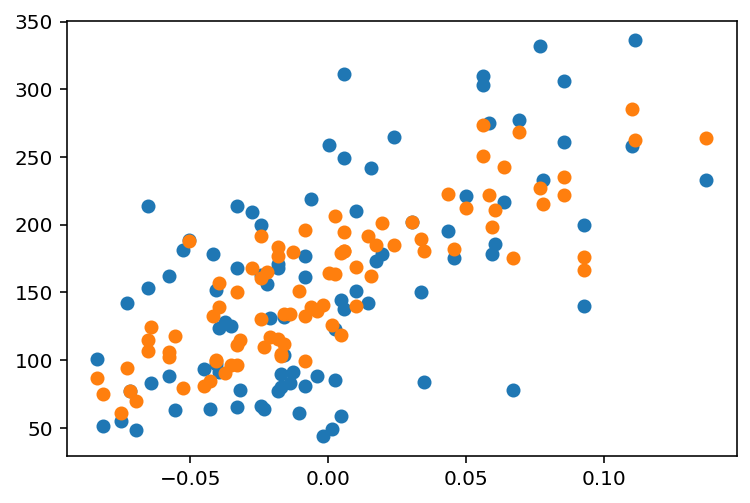

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()